# Functional Images

## Vertical strip


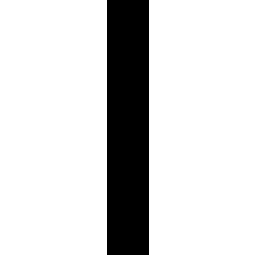

In [1]:
import FunctionalImagesBase
import Codec.Picture

-- The function to genrate a vertical strip
vstrip :: FImage Bool
vstrip (x, y) = abs x < 0.5 

-- /Create the image
myImage :: Image PixelRGB8
myImage = generateImageR2 vstrip (-3, -3) (3, 3) 255

-- Current Directroy is /home/roland/Projekte/FunctionalImages/notebooks
writePng "../images/vstrip.png" myImage

myImage

## Chessboard

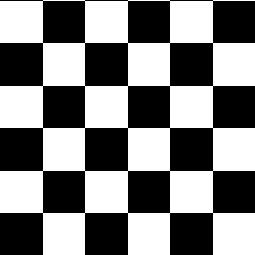

In [2]:
import FunctionalImagesBase
import Codec.Picture

-- The function to create a chess board
checker :: FImage Bool
checker (x, y) = even $ floor x + floor y

-- Create the image
myImage :: Image PixelRGB8
myImage = generateImageR2 checker (-3, -3) (3, 3) 255

writePng "../images/checker.png" myImage

myImage

## Alternate Concentric Rings



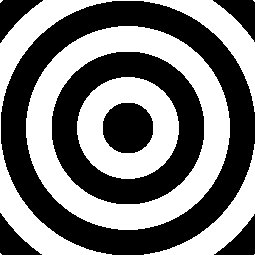

In [5]:
import FunctionalImagesBase
import Codec.Picture

-- | distance to the origin of the coordiante system
distO :: FImage Float
distO (x, y) = sqrt $ x**2 + y**2

-- | alternate concentric Rings
altRings :: FImage Bool
altRings  = even . floor . distO

myImage :: Image PixelRGB8
myImage = generateImageR2 altRings (-5, -5) (5, 5) 255

writePng "../images/altRings.png" myImage
myImage


## Polar Checkboard

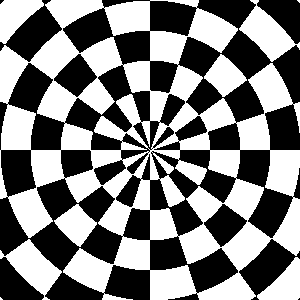

In [4]:
import FunctionalImagesBase
import Codec.Picture

-- | Polar Coordinates
type PolarPoint = (Float, Float)

-- | Convert from Polar to Cartesian coordinates
fromPolar :: PolarPoint -> Point
fromPolar (ρ, θ) = (ρ * cos θ, ρ * sin θ)

-- | Convert from Cartesian to Polar coordinates
toPolar:: Point -> PolarPoint
toPolar (x, y) = (distO (x, y), atan2 y x)

-- | Polar Checkboard
polarChecker :: Int -> FImage Bool
polarChecker n = checker . sc . toPolar
   where
     sc (r,a) = (r,a * fromIntegral n / pi)

myImage :: Image PixelRGB8
myImage = generateImageR2 (polarChecker 10) (-5, -5) (5, 5) 300

writePng "../images/polarChecker.png" myImage
myImage

## Wave Distance

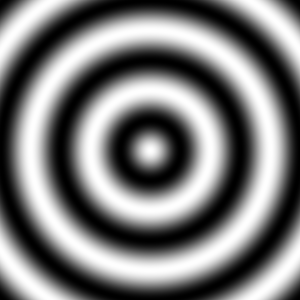

In [4]:
import FunctionalImagesBase
import Codec.Picture

-- | distance to the origin of the coordiante system
distO :: FImage Float
distO (x, y) = sqrt $ x**2 + y**2

-- | waveDist
wavDist :: FImage Frac
wavDist p = (1 + cos (pi * distO p)) / 2

myImage :: Image PixelRGB8
myImage = generateImageR2 wavDist (-5, -5) (5, 5) 300

writePng "../images/wavDist.png" myImage
myImage

## Sierpinski Triangle

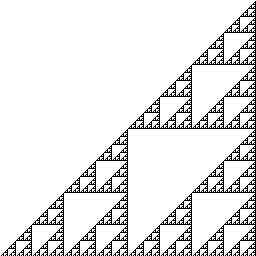

In [1]:
import FunctionalImagesBase
import Codec.Picture
import Data.Bits

-- | sierpinski - An other way to draw a sierpinski triangle
sierpinski :: FImage Bool
sierpinski (x , y) = (abs ix) .|. (abs iy) == abs ix
  where
    ix = round x
    iy = round y

myImage :: Image PixelRGB8
myImage = generateImageR2 sierpinski (0,0) (256, 256) 256
writePng "../images/sierpinski.png" myImage
myImage